In [1]:
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [18]:
model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(32, activation='relu'),
#                           keras.layers.Dense(64, activation='sigmoid'),
                           keras.layers.Dense(10, activation='softmax') # Phi(x) = exp(x_i)/sum_i(exp(x_i))
                           ])

In [19]:
model.compile( optimizer=keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 3.2013 - accuracy: 0.5096 - val_loss: 1.2133 - val_accuracy: 0.6337
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9889 - accuracy: 0.7022 - val_loss: 0.9034 - val_accuracy: 0.7411
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.7112 - accuracy: 0.8041 - val_loss: 0.6719 - val_accuracy: 0.8494
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.5566 - accuracy: 0.8509 - val_loss: 0.5770 - val_accuracy: 0.8734
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4760 - accuracy: 0.8747 - val_loss: 0.4839 - val_accuracy: 0.8799
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4017 - accuracy: 0.8956 - val_loss: 0.4606 - val_accuracy: 0.9081
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3530 - accuracy: 0.9092 - val_loss: 0.3773 - val_accuracy: 0.9116
Epoch 

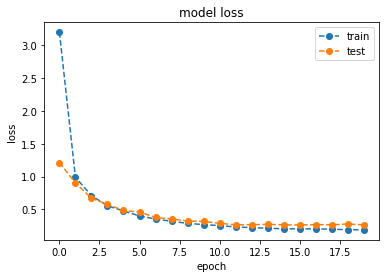

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train', marker='o', linestyle='dashed')
plt.plot(history.history['val_loss'], label='test', marker='o', linestyle='dashed')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

In [22]:
test_loss, test_acc= model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
# make predictions
# predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.9432
Test accuracy: 0.9431999921798706


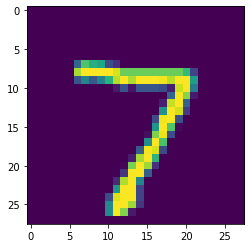

In [29]:
import numpy as np
img = test_images[0]
plt.imshow(img)

In [31]:
pred = model.predict(img[np.newaxis,:,:])
pred

array([[0.0000000e+00, 2.9176779e-26, 3.3536778e-06, 1.9234744e-08,
        6.9229472e-15, 3.1432800e-17, 0.0000000e+00, 9.9999666e-01,
        0.0000000e+00, 1.3649128e-12]], dtype=float32)

In [32]:
np.argmax(pred)

7

In [15]:
from tensorflow.keras.utils import to_categorical
to_categorical(test_labels)[0], test_labels[0]

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32), 7)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


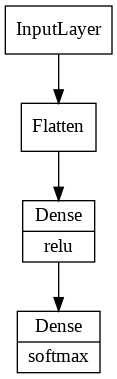

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_layer_names=False, show_layer_activations=True) #, show_layer_activations=True) show_shapes=True, 